**코랩 소프트웨어(라이브러리)버전확인**

In [1]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)


Python 버전: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas 버전: 1.1.5
matplotlib 버전: 3.2.2
NumPy 버전: 1.19.5
SciPy 버전: 1.4.1
IPython 버전: 5.5.0
scikit-learn 버전: 0.22.2.post1


**첫 번째 애플리케이션 : 붓꽃의 품종 분류**


1.   데이터,특성(feature): 독립변수,꽃잎(petal), 꽃받침(sepal) 폭과 길이 cm
2.   클래스(class),레이블(label),타킷(target) : 종속변수, 붓꽃의 품종(setosa, versicolor, vriginica)




**데이터 적재( https://archive.ics.uci.edu/ml/datasets/iris)**



In [2]:
from sklearn.datasets import  load_iris
iris_dataset = load_iris()



**데이터 확인하기**

In [3]:
iris_dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(iris_dataset['DESCR']) #데이터셋에 대한 간략한 설명 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#타깃의 이름 ->품종 확인
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_dataset['target'] #'setosa : 0','vericolor :1','virginica :2'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#특성의 이름 확인
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_dataset['data'] .shape# 데이터의 형태 확인

(150, 4)

In [10]:
type(iris_dataset['data'])# 특성의 값들

numpy.ndarray

In [11]:
type(iris_dataset['target']).shape # 데이터의 타입 확인

<attribute 'shape' of 'numpy.ndarray' objects>

In [12]:
type(iris_dataset['target']) #타켓의 타입 확인

numpy.ndarray

**성과 측정: 훈련 데이터와 테스트 데이터 분리**

In [13]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'],  # 문제지와 답을 주고
    test_size = 0.25, random_state = 777) # 랜덤을 안주면 매번 할 때마다 새로 뽑아서 결과가 매번 바뀐다.

**훈련 데이터 확인하기**

In [14]:
print("X_train 크기:",X_train.shape)
print("y_train 크기:",y_train.shape)

X_train 크기: (112, 4)
y_train 크기: (112,)


**테스트 데이터 확인하기**

In [15]:
print("X_test 크기:",X_test.shape)
print("y_test 크기:",y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


**가장 먼저 할일 :데이터 살펴보기**


In [16]:
import matplotlib.pyplot as plt
import pandas as pd


#x_train 데이터를 사용해서 데이터프레임을 만들기 <- 데이터 시각화를 위해 
#열의 이름은  iris_dataset.feature_names에 있는 문자열 사용

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,2.4,3.3,1.0
1,4.6,3.4,1.4,0.3
2,4.4,3.2,1.3,0.2
3,6.3,2.7,4.9,1.8
4,5.5,2.6,4.4,1.2


**아이리스 데이터 시각화**

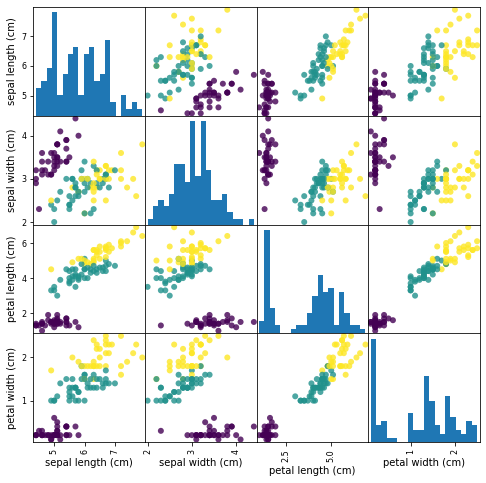

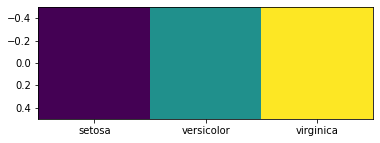

In [17]:
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.

pd.plotting.scatter_matrix(iris_df, c = y_train, figsize=(8,8),
                           marker = 'o', hist_kwds = {'bins': 20}, alpha =.8)

plt.show()

plt.imshow([np.unique(y_train)])
_ = plt.xticks(ticks=np.unique(y_train), labels = iris_dataset['target_names'])

**첫 번째 머신 러닝 모델 : k- 최근접 이웃 알고리즘**

**K-최근접 이웃 알고리즘 이웃 설정**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =1) # 이웃의 개수를 1개로 지정



**학습하기**

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
X_new = np.array([[5, 2.9, 1, 0.2]]) # 꽃 받침 길이,폭, 꽃잎 길이 , 폭 가상의 새 데이터생성

print('X_new.shape:',X_new.shape)

X_new.shape: (1, 4)


**예측하기**

In [21]:
prediction = knn.predict(X_new) # 가상의 데이터로 어떤 붓꽃 품종인지 예측

print("예측 : ", prediction)
print("예측한 타깃의 이름: ",iris_dataset['target_names'][prediction])


예측 :  [0]
예측한 타깃의 이름:  ['setosa']


**모델 평가하기**


In [22]:
y_pred = knn.predict(X_test) # 테스트 셋을 사용해서 모델 예측 후 평가
print("테스트 세트에 대한 예측 값 : " , y_pred)

테스트 세트에 대한 예측 값 :  [2 0 2 2 1 0 2 2 0 0 2 1 1 2 2 2 0 2 0 1 1 1 2 0 2 0 2 0 2 2 0 2 0 2 1 0 0
 0]


**mean() 함수 사용하여 정확도 확인**

In [23]:
np.mean(y_pred == y_test) #y_pred와 y_test가 같을 경우의 평균을 낸다(Ture 몇개인지 평균을 낸다)


0.9736842105263158

**score() 함수 사용하여 정확도 확인**

In [24]:
knn.score(X_test, y_test)#test 의 정확도를 계산

0.9736842105263158

**요약**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.4f}%".format(knn.score(X_test, y_test) *100))


테스트 세트의 정확도: 97.3684%


****